#Topic Modeling models evaluation, based on speed and output evaluation metrics

In [ ]:
!pip install datasets
!pip install --upgrade datasets



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 26.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_dataset

dataset = load_dataset("nbertagnolli/counsel-chat")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/2775 [00:00<?, ? examples/s]

In [ ]:
df = dataset["train"].to_pandas()
answer_text = df["answerText"]
question_text = df["questionText"]

print("Some first answers : ")
print(answer_text.head())

print("Some first questions : ")
print(question_text.head())


Some first answers : 
0    It is very common for people to have multiple ...
1    I've never heard of someone having "too many i...
2    Absolutely not.  I strongly recommending worki...
3    Let me start by saying there are never too man...
4    I just want to acknowledge you for the courage...
Name: answerText, dtype: object
Some first questions : 
0    I have so many issues to address. I have a his...
1    I have so many issues to address. I have a his...
2    I have so many issues to address. I have a his...
3    I have so many issues to address. I have a his...
4    I have so many issues to address. I have a his...
Name: questionText, dtype: object


In [ ]:
#Checking for missing values in each column
miss_answer = answer_text.isnull()
print("Number of missing values in the answer column is : ", miss_answer.sum())

miss_quest = question_text.isnull()
print("Number of missing values in the question column is : ", miss_quest.sum())


Number of missing values in the answer column is :  26
Number of missing values in the question column is :  139


In [ ]:
#removing missing values :
df_no_missing_values = df.dropna(subset=["questionText","answerText"])
cleaned_new_answertext = df_no_missing_values["answerText"]
cleaned_new_questionText = df_no_missing_values["questionText"]

print("checking :",cleaned_new_answertext.isnull().sum() )
print("checking :",cleaned_new_questionText.isnull().sum() )


checking : 0
checking : 0


In [ ]:
type(answer_text)
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=bdf292ad7a8c8e9e98ca06dead06f59179711cdea36b80139bbf45c0fc0fe931
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pandas as pd
from langdetect import detect

# Assuming 'df' is your DataFrame and 'text_column' is the column containing text data
for index, row in df_no_missing_values.iterrows():
    text = row['answerText']
    try:
        lang = detect(text)
        if lang != 'en':
            # Remove or filter non-English texts
            df.drop(index, inplace=True)
    except:
        # Handle exceptions if any
        pass

cleaned_new_answertext = df_no_missing_values["answerText"]
cleaned_new_questionText = df_no_missing_values["questionText"]

In [ ]:
print(len(df_no_missing_values["answerText"]),len(cleaned_new_answertext))


2612 2612


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Spacy

In [ ]:
#Preprocessing steps using spaCy
import spacy

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # Parse the text using spaCy
    doc = nlp(text)

    stopwords = nlp.Defaults.stop_words

    # Lemmatization for adjectives and nouns
    lemmatized_tokens = [token.lemma_ for token in doc if token.pos_ in ['ADJ', 'NOUN'] and token.text not in stopwords and not token.is_punct]

    return lemmatized_tokens

final_text = []
for text in cleaned_new_answertext:
    text_final = preprocess(text)
    final_text.append(text_final)

print(final_text[0:3])
print(len(final_text))

[['common', 'people', 'multiple', 'issue', 'address', 'counseling', 'client', 'question', 'exploration', 'underlying', 'fear', 'therapist', 'ring', 'true', 'people', 'problem', 'life', 'people', 'numerous', 'significant', 'stressor', 'life', 'life', 'complicated', 'therapist', 'ready', 'equipped', 'issue', 'small', 'large', 'client', 'session', 'Most', 'therapist', 'couple', 'session', 'issue', 'issue', 'distress', 'issue', 'counseling', 'issue', 'counseling'], ['issue', 'therapy', 'effective', 'competent', 'therapist', 'root', 'cause', 'problem', 'underlying', 'issue', 'symptom', 'example', 'history', 'sexual', 'trauma', 'sleep', 'disturbance', 'depression', 'anxiety', 'low', 'self', 'worth', 'trauma', 'client', 'unresolved', 'trauma', 'negative', 'core', 'belief', 'response', 'trauma', 'negative', 'belief', 'self', 'esteem', 'feeling', 'self', 'worth'], ['issue', 'need', 'time', 'therapy', 'smart', 'goal', 'objective', 'goal', 'survivor', 'victim', 'good']]
2612


#Topic modeling algorithms application


**Evaluation metrics :**

In [ ]:
#Calculating the coherence  :
def get_coherence(topics, documents):

    id2word = corpora.Dictionary(documents)
    cm = CoherenceModel(topics=topics,
                        texts=documents,
                        dictionary=id2word,
                        coherence='c_v')

    return cm.get_coherence()


# Calculating Coherence for evaluation :
from gensim.models import CoherenceModel
def coherence_score(lda_model, tf_vectorizer, texts):
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=tf_vectorizer, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


So we will start with LDA algorithm where it is commonly applied on the BOW of each document.


**LDA with BoW using scikit-learn**


In [ ]:
#!pip install --upgrade scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import pandas as pd

# Convert the list of tokens back to text
final_text_joined = [' '.join(tokens) for tokens in final_text]
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(final_text_joined)
#max_df=0.95 -> terms appearing in more than 95% of the documents will be ignored.
#min_df=2 -> terms must appear in at least 2 documents to be considered.

#Fit the LDA model

lda_model = LatentDirichletAllocation(n_components=10, max_iter=50, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

def display_topics(lda_model, tf_vectorizer):
    feature_names = tf_vectorizer.get_feature_names_out()
    topic_dict = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[::-1]]
        topic_dict["Topic %d" % (topic_idx)] = topic_words
    return pd.DataFrame(topic_dict)

topicsLDA1 = display_topics(lda_model, tf_vectorizer)

print(topicsLDA1)



           Topic 0        Topic 1       Topic 2      Topic 3     Topic 4  \
0             boss      workplace  relationship        dream     meeting   
1     dissociation         proper          time        sleep         law   
2       psychopath       employee           way    nightmare       legal   
3          craving  inappropriate          good     drinking      letter   
4         syndrome         tissue        people   infidelity     ethical   
...            ...            ...           ...          ...         ...   
3389     crippling        cutting  wordsection1        padre      boring   
3390           hay        breathe     signature     upheaval  comentario   
3391     reenfocar      inventory           mso  physicality       crack   
3392   dependiendo         estado         latin   pagination      throat   
3393          nose           dull  compensation     fighting    resident   

          Topic 5     Topic 6     Topic 7     Topic 8      Topic 9  
0          circle 

In [ ]:
import numpy as np
log_likelihood = lda_model.score(tf)

# Calculate perplexity
perplexity1 = np.exp(-log_likelihood / tf.shape[0])
print("preplexity is ",perplexity1)
#def coherence_score(lda_model, tf_vectorizer, texts)

preplexity is  3.313950559679351e+109


In [ ]:
!pip install tmtoolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for globre: filename=globre-0.1.5-py3-none-any.whl size=19546 sha256=d9f2dec0577b5c9fa4286aa372e7713bafdaea70c70f3bc3dc7f3faff4c45508
  Stored in directory: /root/.cache/pip/wheels/e6/c5/26/0d27e07d567b3b4e63a618efff19a2cdbab636ac1295d20206
Successfully built globre


In [ ]:
import tmtoolkit

vocaby = np.array(tf_vectorizer.get_feature_names_out())

coherence = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v',
                        top_n=10,
                        topic_word_distrib=lda_model.components_,
                        dtm=tf,
                        vocab=vocaby,
                        texts=final_text)
np.mean(coherence)

0.483968623590307

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

dictionary1 = Dictionary(final_text)
corpus1 = [dictionary1.doc2bow(text) for text in final_text]

# we chAnged the chunksize and the number of passes to get more accurate rresults

lda_model1 = LdaModel(corpus=corpus1, id2word=dictionary1, num_topics=10,chunksize=250, passes=50)

# Print the topics
for idx, topic in lda_model1.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.055*"therapist" + 0.033*"therapy" + 0.026*"client" + 0.025*"counselor" + 0.018*"good" + 0.018*"counseling" + 0.015*"issue" + 0.014*"session" + 0.013*"emotion" + 0.013*"time"

Topic: 1 
Words: 0.020*"que" + 0.015*"harm" + 0.014*"puede" + 0.013*"consequence" + 0.011*"o" + 0.009*"medium" + 0.008*"pero" + 0.008*"animal" + 0.008*"fee" + 0.007*"culture"

Topic: 2 
Words: 0.058*"topic" + 0.050*"wish" + 0.026*"secure" + 0.021*"wise" + 0.020*"legal" + 0.018*"image" + 0.015*"side" + 0.015*"clarity" + 0.013*"paperwork" + 0.011*"critic"

Topic: 3 
Words: 0.031*"thing" + 0.029*"thought" + 0.026*"people" + 0.025*"time" + 0.023*"life" + 0.020*"way" + 0.019*"anxiety" + 0.016*"feeling" + 0.014*"fear" + 0.012*"self"

Topic: 4 
Words: 0.037*"child" + 0.033*"parent" + 0.025*"family" + 0.023*"support" + 0.018*"mom" + 0.015*"daughter" + 0.014*"group" + 0.014*"good" + 0.014*"school" + 0.013*"situation"

Topic: 5 
Words: 0.053*"husband" + 0.051*"marriage" + 0.029*"woman" + 0.023*"man" + 0.0

In [ ]:
from gensim.models import CoherenceModel

coherence_model_lda=CoherenceModel(model=lda_model1,texts=final_text, dictionary=dictionary1, coherence='c_v')

# cv means cosine similarity

coherence_lda=coherence_model_lda.get_coherence()
print('Coherence Score: ',coherence_lda)

Coherence Score:  0.45755219515629025


In [ ]:
corpus_lda = lda_model1[corpus1]  # get the topic distribution for each document in the corpus
perplexity1 = lda_model1.log_perplexity(corpus_lda)
print("Perplexity: ", perplexity1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity:  -17.799824438961213


**NMF with BoW**


In [ ]:
from sklearn.decomposition import NMF


# Create TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(final_text_joined)

# Apply NMF
nmf_model = NMF(n_components=10, random_state=1, l1_ratio=.5, init='nndsvd',max_iter = 50).fit(tfidf)

display_topics(nmf_model, tfidf_vectorizer)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn(


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,people,therapist,relationship,child,therapy,issue,anxiety,client,thought,husband
1,time,right,partner,parent,emotion,counseling,depression,counselor,negative,marriage
2,life,comfortable,boyfriend,daughter,normal,trauma,symptom,counseling,feeling,sex
3,thing,good,trust,school,feeling,problem,social,session,self,sexual
4,way,fit,person,adult,tear,depression,attack,goal,positive,partner
...,...,...,...,...,...,...,...,...,...,...
3389,consensual,identification,garbage,finish,house,neurotransmitter,magical,mucho,mode,meltdown
3390,mile,identity,procesar,planning,household,neuroscience,magnitude,mso,mixed,member
3391,milestone,ill,probono,firearm,reward,neurological,mail,movie,misunderstood,memory
3392,conscious,sake,gathering,planet,hr,neurofeedback,main,movement,misunderstanding,menstrual


In [ ]:
import tmtoolkit

vocaby = np.array(tfidf_vectorizer.get_feature_names_out())

coherence = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v',
                        top_n=10,
                        topic_word_distrib=nmf_model.components_,
                        dtm=tfidf,
                        vocab=vocaby,
                        texts=final_text)
np.mean(coherence)


0.6053882380770063

#HDP with BoW (Just work with gensim library) spaCy preprocessing


In [ ]:
from gensim.models import HdpModel
from gensim.corpora import Dictionary


# Hierarchical Dirichlet Process
# Create dictionary and corpus
dictionaryHDP = Dictionary(final_text)
corpusHDP = [dictionaryHDP.doc2bow(text) for text in final_text]

# Apply HDP
#hdp_model = HdpModel(corpusHDP, id2word=dictionaryHDP, alpha=0.2, gamma=0.1, eta=0.1)
# coherence score : 0.7

hdp_model = HdpModel(corpusHDP, id2word=dictionaryHDP, alpha=0.3, gamma=0.05, eta=0.1)



#Higher values of alpha will lead to more topics being active in each document,
#while lower values will lead to fewer topics being active.
#By adjusting alpha, you can control the balance between topic specificity and document coverage

#Higher values of gamma will lead to more words being assigned to each topic, while lower values will lead to fewer words

#Higher values of eta will lead to more words being assigned to each topic, while lower values will lead to fewer words.
#By adjusting eta, you can control the balance between topic specificity and word coverage at the global level.


topic_info = hdp_model.print_topics(num_topics=5, num_words=10)
display(topic_info)


[(0,
  '0.018*therapist + 0.016*relationship + 0.015*good + 0.014*time + 0.013*way + 0.011*thing + 0.010*client + 0.009*people + 0.009*counselor + 0.008*life'),
 (1,
  '0.007*relationship + 0.007*time + 0.006*way + 0.006*good + 0.004*therapist + 0.004*font + 0.004*thing + 0.004*people + 0.004*family + 0.004*life'),
 (2,
  '0.007*time + 0.007*relationship + 0.007*way + 0.006*good + 0.006*people + 0.004*thing + 0.004*feeling + 0.003*life + 0.003*therapist + 0.003*person'),
 (3,
  '0.005*good + 0.005*time + 0.004*life + 0.004*thing + 0.004*relationship + 0.003*way + 0.003*therapist + 0.003*people + 0.003*self + 0.003*feeling'),
 (4,
  '0.004*thing + 0.004*way + 0.003*relationship + 0.003*time + 0.003*good + 0.003*people + 0.002*life + 0.002*feeling + 0.002*anxiety + 0.002*question')]

In [ ]:
from gensim.models import CoherenceModel
coherenceHDP =CoherenceModel(model=hdp_model,texts=final_text,dictionary=dictionaryHDP,coherence='c_v')

coherenceHDP =coherenceHDP.get_coherence()
print('Coherence Score: ',coherenceHDP)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.7018558785187294


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


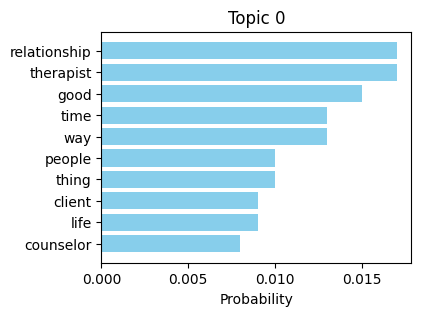

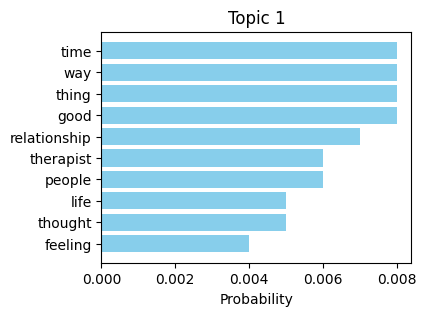

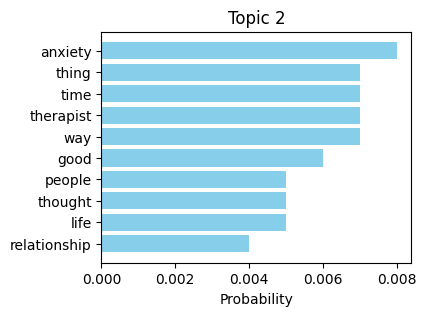

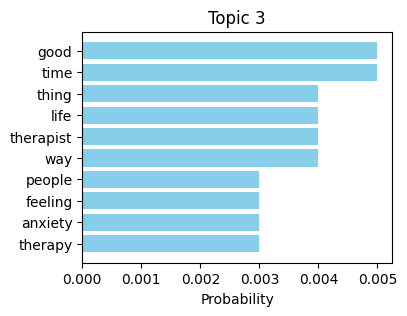

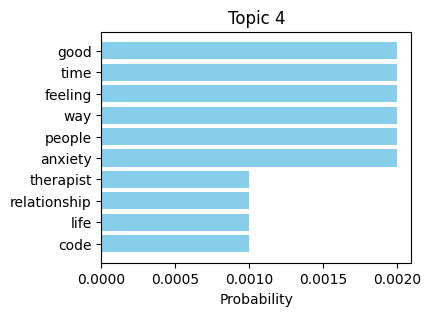

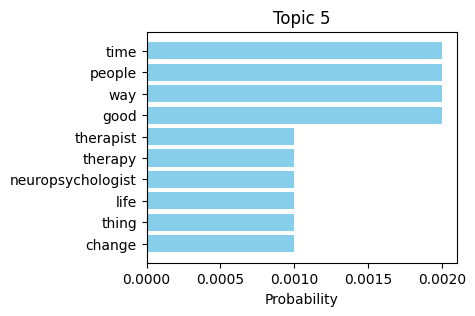

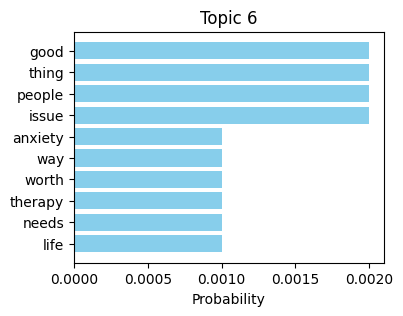

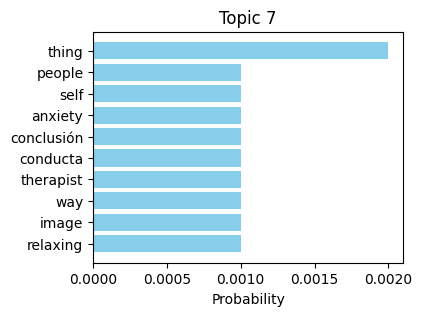

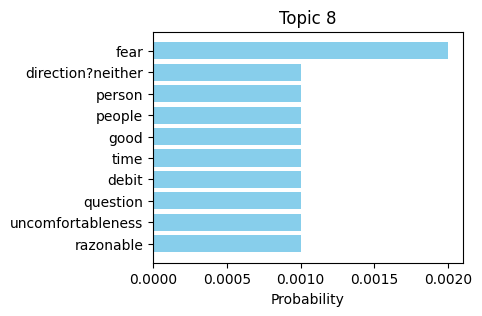

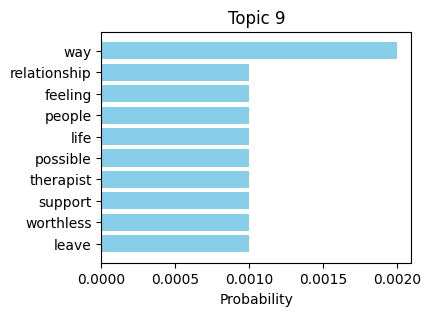

In [ ]:
import matplotlib.pyplot as plt

# Example topics data
topics_data = [(0, '0.017*relationship + 0.017*therapist + 0.015*good + 0.013*time + 0.013*way + 0.010*people + 0.010*thing + 0.009*client + 0.009*life + 0.008*counselor'),
               (1, '0.008*time + 0.008*way + 0.008*thing + 0.008*good + 0.007*relationship + 0.006*therapist + 0.006*people + 0.005*life + 0.005*thought + 0.004*feeling'),
               (2, '0.008*anxiety + 0.007*thing + 0.007*time + 0.007*therapist + 0.007*way + 0.006*good + 0.005*people + 0.005*thought + 0.005*life + 0.004*relationship'),
               (3, '0.005*good + 0.005*time + 0.004*thing + 0.004*life + 0.004*therapist + 0.004*way + 0.003*people + 0.003*feeling + 0.003*anxiety + 0.003*therapy'),
               (4, '0.002*good + 0.002*time + 0.002*feeling + 0.002*way + 0.002*people + 0.002*anxiety + 0.001*therapist + 0.001*relationship + 0.001*life + 0.001*code'),
               (5, '0.002*time + 0.002*people + 0.002*way + 0.002*good + 0.001*therapist + 0.001*therapy + 0.001*neuropsychologist + 0.001*life + 0.001*thing + 0.001*change'),
               (6, '0.002*good + 0.002*thing + 0.002*people + 0.002*issue + 0.001*anxiety + 0.001*way + 0.001*worth + 0.001*therapy + 0.001*needs + 0.001*life'),
               (7, '0.002*thing + 0.001*people + 0.001*self + 0.001*anxiety + 0.001*conclusión + 0.001*conducta + 0.001*therapist + 0.001*way + 0.001*image + 0.001*relaxing'),
               (8, '0.002*fear + 0.001*direction?neither + 0.001*person + 0.001*people + 0.001*good + 0.001*time + 0.001*debit + 0.001*question + 0.001*uncomfortableness + 0.001*razonable'),
               (9, '0.002*way + 0.001*relationship + 0.001*feeling + 0.001*people + 0.001*life + 0.001*possible + 0.001*therapist + 0.001*support + 0.001*worthless + 0.001*leave')]

# Function to extract topic words and probabilities
def extract_words_probs(topic_str):
    words_probs = [word_prob.split('*') for word_prob in topic_str.split(' + ')]
    words, probs = zip(*[(word.strip(), float(prob)) for prob, word in words_probs])
    return words, probs

# Plot bar chart for each topic
for topic_id, topic_str in topics_data:
    words, probs = extract_words_probs(topic_str)
    plt.figure(figsize=(4, 3))
    plt.barh(range(len(words)), probs, color='skyblue')
    plt.yticks(range(len(words)), words)
    plt.xlabel('Probability')
    plt.title(f'Topic {topic_id}')
    plt.gca().invert_yaxis()
    plt.show()


#LSA with TF-IDF on Spacy: **

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Combine preprocessed tokens back into text
final_text_joined = [' '.join(tokens) for tokens in final_text]

# TF-IDF Vectorization
vectorizerLSA = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf_idf_matrix = vectorizerLSA.fit_transform(final_text_joined)

# Dimensionality reduction using SVD (similar to LSA)
n_components = 10  # Adjust the number of dimensions (topics)
svd = TruncatedSVD(n_components=n_components)
lsa_matrix = svd.fit_transform(tf_idf_matrix)

def display_lsa_components(model, vectorizer, no_top_words):
    vocabulary = vectorizer.vocabulary_
    for comp_idx, component in enumerate(model.components_):
        print(f"Component {comp_idx}:")
        top_words_indices = component.argsort()[:-no_top_words - 1:-1]  # Indices of top words
        top_words = [list(vocabulary.keys())[i] for i in top_words_indices]  # Get words from indices
        print(" ".join(top_words))

display_lsa_components(svd, vectorizerLSA, 10)

Component 0:
premise inconsiderate smile feat transitioning loyalty revelation fallible sensation memory
Component 1:
premise loyalty opinion disproportionate caregiver sibling huge separate boiling perception
Component 2:
impact divorced progressive goodbye fallible revelation inability informational sensation balanced
Component 3:
room philosophical acupuncture premise compassionate forgiveness lucky necessary realization perception
Component 4:
balanced loyalty room memory conducive philosophical afraid ambivalent forgiveness chain
Component 5:
caregiver huge perception opinion motive loyalty inconsiderate bodyspotting goodbye sensation
Component 6:
opinion perception divorced huge inability floor fallible revelation unsuccessful massage
Component 7:
opinion impact inconsiderate perception room loyalty disproportionate philosophical conducive informational
Component 8:
divorced room caregiver remedy huge inconsiderate philosophical abstract belly premise
Component 9:
empathy balance

In [ ]:
import tmtoolkit

vocaby = np.array(vectorizerLSA.get_feature_names_out())

coherence = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v',
                        top_n=10,
                        topic_word_distrib=svd.components_,
                        dtm=tf_idf_matrix,
                        vocab=vocaby,
                        texts=final_text)
np.mean(coherence)

0.4818331677457889

##NLTK preprocessing:

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import string

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # POS tagging
    tokens_pos = pos_tag(tokens)

    # Lemmatization for adjectives and nouns
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(pos_tag)) for word, pos_tag in tokens_pos
              if pos_tag.startswith('J') or pos_tag.startswith('N')]

    return tokens

# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a'  # Adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # Verb
    elif treebank_tag.startswith('N'):
        return 'n'  # Noun
    elif treebank_tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to noun
preprocessed_textN = []

for text in cleaned_new_answertext:
  textfinal = preprocess(text)
  preprocessed_textN.append(textfinal)


print(preprocessed_textN[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['common', 'people', 'multiple', 'issue', 'need', 'address', 'client', 'question', 'exploration', 'underlying', 'fear', 'much', 'therapist', 'ring', 'true', 'people', 'problem', 'people', 'numerous', 'significant', 'stressor', 'let', 'face', 'life', 'therapist', 'ready', 'handle', 'issue', 'small', 'large', 'client', 'present', 'session', 'therapist', 'couple', 'session', 'issue', 'start', 'issue', 'distress', 'many', 'issue', 'issue', 'mention']


In [ ]:
# Create an empty dictionary to store the word counts
word_counts = {}

# Iterate over each document
for doc in preprocessed_textN:
    # Iterate over each word in the document
    for word in doc:
        # Increment the count for the word in the dictionary
        word_counts[word] = word_counts.get(word, 0) + 1


min_count = 10
word_counts = {word: count for word, count in word_counts.items() if count >= min_count}

# Create a dictionary object mapping words to unique IDs
dictionary2 = {word: index for index, word in enumerate(word_counts.keys())}




print("Length of processed_docs:", len(preprocessed_textN))
print("Length of dictionary:", len(dictionary2))

# Print the first 10 items in the dictionary (word, index)
for index, (word, _) in enumerate(dictionary2.items()):
    if index >= 10:
        break
    print(word, index)


Length of processed_docs: 2612
Length of dictionary: 1565
common 0
people 1
multiple 2
issue 3
need 4
address 5
client 6
question 7
exploration 8
underlying 9



TF-IDF Vectorization


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert preprocessed text to numerical vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X2 = tfidf_vectorizer.fit_transform([text for text in dictionary2.keys()])
print(X2.shape)

(1565, 1546)


In [ ]:
## We will use PCA only on the large dataset for reduction and clustering, here is the code.
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X2_reduced= pca.fit_transform(X2.toarray())
X2_reduced.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1565, 1459)

#LDA with NLTK and sklearn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Convert the list of tokens back to text
final_text2 = [' '.join(tokens) for tokens in preprocessed_textN]
tf_vectorizer2 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf2 = tf_vectorizer2.fit_transform(final_text2)
#max_df=0.95 -> terms appearing in more than 95% of the documents will be ignored.
#min_df=2 -> terms must appear in at least 2 documents to be considered.

#Fit the LDA model
lda_model2 = LatentDirichletAllocation(n_components=10, max_iter=50, learning_method='online', learning_offset=50.,random_state=0,batch_size=250).fit(tf2)

def display_topics(lda_model, tf_vectorizer):
    feature_names = tf_vectorizer.get_feature_names_out()
    topic_dict = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[::-1]]
        topic_dict["Topic %d" % (topic_idx)] = topic_words
    return pd.DataFrame(topic_dict)

display_topics(lda_model2, tf_vectorizer2)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,dog,child,anxiety,therapist,hears,relationship,cycle,heck,que,mso
1,manager,parent,thought,client,presentation,time,winter,bump,la,font
2,blog,family,depression,therapy,skype,way,day,scream,tu,addiction
3,friends,support,help,counselor,elusive,people,binge,abrupt,para,family
4,adjustment,daughter,thing,session,bonding,thing,weather,honeymoon,te,theme
...,...,...,...,...,...,...,...,...,...,...
4684,compensate,den,telling,siente,healing,connective,remark,ver,inpatient,puedan
4685,ayudo,autoestima,street,comb,gary,latin,earn,abnormal,invitation,burn
4686,hables,atención,recientemente,absent,afterlife,export,surprising,content,pack,shade
4687,tear,momentos,orphan,prefers,chowwww,props,debate,gentle,battle,dificultad


In [ ]:
log_likelihood = lda_model2.score(tf2)

# Calculate perplexity
perplexity = np.exp(-log_likelihood / tf2.shape[0])
print("preplexity is ",perplexity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


preplexity is  4.655542399488397e+133


In [ ]:
import tmtoolkit

vocaby = np.array(tf_vectorizer2.get_feature_names_out())

coherenceLDA = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v',
                        top_n=10,
                        topic_word_distrib=lda_model2.components_,
                        dtm=tf2,
                        vocab=vocaby,
                        texts=preprocessed_textN, return_mean=True)
print(coherenceLDA)

nan


/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


#LSA with NLTK :

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Combine preprocessed tokens back into text
final_text22 = [' '.join(tokens) for tokens in preprocessed_textN]

# TF-IDF Vectorization
vectorizer22 = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf_idf_matrix22 = vectorizer22.fit_transform(final_text22)

# Dimensionality reduction using SVD (similar to LSA)
n_components = 10  # Adjust the number of dimensions (topics)
svd2 = TruncatedSVD(n_components=n_components)
lsa_matrix = svd2.fit_transform(tf_idf_matrix22)

def display_lsa_components(model, vectorizer, no_top_words):
    vocabulary = vectorizer.vocabulary_
    for comp_idx, component in enumerate(model.components_):
        print(f"Component {comp_idx}:")
        top_words_indices = component.argsort()[:-no_top_words - 1:-1]  # Indices of top words
        top_words = [list(vocabulary.keys())[i] for i in top_words_indices]  # Get words from indices
        print(" ".join(top_words))

display_lsa_components(svd2, vectorizer22, 10)

Component 0:
dissociation unethical slot saying syndrome validated han integrate decline date
Component 1:
unethical integrate unless chapter possession relax pressure pedophilia trapping ca
Component 2:
dissociation unethical achieve unless ｍｓ reverse schoolwork chapter ti science
Component 3:
action sends unethical repair validate ma wants ugh luck relax
Component 4:
relief possession dissociation combat scripture achieve grandchild pedophilia general empowers
Component 5:
possession integrate action myriad hide sends markmorrislcsw dissociation kick unless
Component 6:
comunicar texas signature spider retreat actual unless 0pt impulsive force
Component 7:
unless relax ca file dissociation syndrome chapter missing candy vuelve
Component 8:
relief action dissociation sends unless integrate helpguide achieve myriad markmorrislcsw
Component 9:
helpguide possession realm discussed letting unethical action unless dissociation file


In [ ]:
import tmtoolkit

vocaby = np.array(vectorizer22.get_feature_names_out())

coherenceLDA = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v',
                        top_n=10,
                        topic_word_distrib=svd2.components_,
                        dtm=tf_idf_matrix22,
                        vocab=vocaby,
                        texts=preprocessed_textN, return_mean=True)
print(coherenceLDA)

0.5703272422005503


#NMF WITH nltk


In [ ]:
from sklearn.decomposition import NMF

# Create TF-IDF representation
tfidf_vectorizernmf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidfnmf = tfidf_vectorizernmf.fit_transform(final_text2)

# Apply NMF
nmf_model2 = NMF(n_components=10, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidfnmf)

display_topics(nmf_model2, tfidf_vectorizernmf)


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,people,therapist,relationship,child,issue,therapy,que,client,anxiety,thought
1,time,comfortable,partner,parent,trauma,emotion,la,counselor,depression,negative
2,thing,right,trust,daughter,problem,normal,tu,session,symptom,self
3,life,fit,couple,school,help,feeling,para,goal,social,positive
4,way,session,sex,adult,address,tear,te,work,attack,feeling
...,...,...,...,...,...,...,...,...,...,...
4684,memorias,imagination,meltdown,quality,necesita,responsibility,hug,nervioso,majority,motivate
4685,creep,imaginary,mejor,quantity,necesario,responsible,https,neighbor,maintenance,motion
4686,creo,scenery,meeting,frustrate,neat,hint,http,negociar,mainstream,motif
4687,crime,image,medium,fruitful,nearby,hijos,html,neglect,main,motherhood


In [ ]:
import tmtoolkit

vocaby = np.array(tfidf_vectorizernmf.get_feature_names_out())

coherenceNMF2 = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v',
                        top_n=10,
                        topic_word_distrib=nmf_model2.components_,
                        dtm=tfidfnmf,
                        vocab=vocaby,
                        texts=preprocessed_textN, return_mean=True)
print(coherenceNMF2)

0.676697061101313


#HDP with nltk

In [ ]:
from gensim.models import HdpModel
from gensim.corpora import Dictionary

# Create dictionary and corpus
dictionary23 = Dictionary(preprocessed_textN)
corpus23 = [dictionary23.doc2bow(text) for text in preprocessed_textN]

# Apply HDP
hdp_model2 = HdpModel(corpus23, id2word=dictionary23)


topic_info = hdp_model2.print_topics(num_topics=10, num_words=10)
display(topic_info)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.010*time + 0.010*relationship + 0.009*therapist + 0.009*way + 0.007*people + 0.007*good + 0.007*client + 0.007*thing + 0.006*question + 0.006*feel'),
 (1,
  '0.011*therapist + 0.010*relationship + 0.008*time + 0.008*way + 0.007*good + 0.006*feel + 0.006*thing + 0.006*counselor + 0.006*life + 0.005*people'),
 (2,
  '0.010*relationship + 0.008*way + 0.008*therapist + 0.007*thing + 0.007*time + 0.007*people + 0.007*good + 0.006*help + 0.006*feel + 0.006*client'),
 (3,
  '0.008*relationship + 0.006*way + 0.006*people + 0.006*time + 0.006*therapist + 0.006*thing + 0.005*life + 0.005*good + 0.004*help + 0.004*feel'),
 (4,
  '0.006*time + 0.006*way + 0.005*thing + 0.005*therapist + 0.005*relationship + 0.004*something + 0.004*feel + 0.004*help + 0.004*good + 0.004*people'),
 (5,
  '0.006*therapist + 0.005*people + 0.005*time + 0.004*relationship + 0.004*someone + 0.004*thing + 0.004*help + 0.004*good + 0.004*way + 0.003*many'),
 (6,
  '0.007*que + 0.004*relationship + 0.003*la + 0.0

In [ ]:
#graphic presentation for hdp :
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each topic
for idx, topic in enumerate(hdp_model2.print_topics()):
    word_freq = dict(topic[0])
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {idx}')
    plt.axis('off')
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: 'int' object is not iterable

In [ ]:
# Generate word clouds for each topic
from wordcloud import WordCloud
import matplotlib.pyplot as plt



for idx, topic in enumerate(hdp_model2.show_topics()):
    # Parsing the string representation of the top words and convert it to a dictionary
    top_words = topic[1].split(' + ')
    word_freq = {word: 1 for word in top_words}
    for word, freq in word_freq.items():
        word_freq[word] = topic[2][word]

    # Generate the word cloud
    wordcloud = WordCloud(background_color='black').generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {idx}')
    plt.axis('off')
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: tuple index out of range

In [ ]:
from gensim.models import CoherenceModel
coherenceHDP2 =CoherenceModel(model=hdp_model2,texts=preprocessed_textN,dictionary=dictionary23,coherence='c_v')

coherenceHDP2 =coherenceHDP2.get_coherence()
print('Coherence Score: ',coherenceHDP2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.6964652253596211


#Genism preprocessing


In [ ]:
#tokenizing, normalizing, and cleaning text easier , we have to add removing stopwords :
import gensim
import numpy as np

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS as stopwords


def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text, min_len=4):
        if token not in list(stopwords):
            result.append(token)
    return result

preprocessed_textG=[]
for text in cleaned_new_answertext:
     preprocessed =  preprocess(text)
     preprocessed_textG.append(preprocessed)
print( preprocessed_textG[0])

['common', 'people', 'multiple', 'issues', 'want', 'need', 'address', 'counseling', 'clients', 'question', 'exploration', 'underlying', 'fear', 'helped', 'therapist', 'know', 'rings', 'true', 'people', 'problem', 'lives', 'people', 'numerous', 'significant', 'stressors', 'lives', 'face', 'life', 'complicated', 'therapists', 'completely', 'ready', 'equipped', 'handle', 'issues', 'small', 'large', 'client', 'presents', 'session', 'therapists', 'couple', 'sessions', 'help', 'prioritize', 'issues', 'facing', 'start', 'addressing', 'issues', 'causing', 'distress', 'issues', 'address', 'counseling', 'issues', 'mention', 'successfully', 'worked', 'counseling']


In [ ]:
# applying TFIDF using genism :
from gensim.models.tfidfmodel import TfidfModel
from gensim.corpora import Dictionary


dictionary3 = Dictionary(preprocessed_textG)

# Bag of words 3
corpus3 = [dictionary3.doc2bow(doc) for doc in preprocessed_textG]

# Calculate TF-IDF
tfidf_model3 = TfidfModel(corpus3)

# Transform the corpus into TF-IDF space
X3 = tfidf_model3[corpus3]

# here we have a tfidf represenation of pur text from each row

print("Length of processed_docs:", len(preprocessed_textG))
print("Length of dictionary:", len(dictionary3))

Length of processed_docs: 2612
Length of dictionary: 11828


In [ ]:
print("the nltk result",len(preprocessed_textN[0]))
print("the genism result" , len(preprocessed_textG[0]))
# we can assume that we ahve the same results when using both libraries
# preprocessed_tex is a list of tokens for each document

the nltk result 44
the genism result 60


In [ ]:
# N_Grams
def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [' '.join(grams) for grams in n_grams]

bigrams = []
for article in all_texts:
    bigrams += list(map(lambda x: x[0], list(filter(lambda x: x[1] >= 5, Counter(get_ngrams(article, 2)).most_common()))))

bigrams = list(filter(lambda x: 'package' not in x and 'document' not in x, bigrams))
bigrams = list(map(lambda x: x[0], (list(filter(lambda x: x[1] >= 5, Counter(bigrams).most_common())))))

print(len(bigrams))
print(bigrams[:5])

#LDA in Genism

In [ ]:
!pip install pyldavis
!pip install graphlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.3 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement graphlab (from versions: none)
ERROR: No matching distribution found for graphlab


In [ ]:
from gensim.models.ldamodel import LdaModel

lda_model3 = LdaModel(corpus=corpus3, id2word=dictionary3, num_topics=10, chunksize=250 , passes = 50)

# Print the topics
for idx, topic in lda_model3.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.031*"relationship" + 0.017*"want" + 0.017*"know" + 0.016*"like" + 0.015*"feel" + 0.013*"time" + 0.013*"person" + 0.010*"need" + 0.010*"good" + 0.009*"partner"

Topic: 1 
Words: 0.031*"sexual" + 0.021*"mother" + 0.012*"intimacy" + 0.012*"conversations" + 0.011*"ability" + 0.011*"anger" + 0.010*"kids" + 0.009*"meeting" + 0.009*"panic" + 0.009*"woman"

Topic: 2 
Words: 0.070*"therapist" + 0.053*"therapy" + 0.035*"counseling" + 0.030*"client" + 0.030*"counselor" + 0.017*"help" + 0.015*"issues" + 0.014*"session" + 0.014*"clients" + 0.013*"therapists"

Topic: 3 
Words: 0.017*"stress" + 0.016*"anger" + 0.015*"symptoms" + 0.015*"coping" + 0.013*"skills" + 0.010*"grief" + 0.010*"help" + 0.010*"helps" + 0.010*"depression" + 0.010*"sleep"

Topic: 4 
Words: 0.027*"match" + 0.023*"addiction" + 0.020*"opinion" + 0.016*"bipolar" + 0.014*"personality" + 0.012*"prefer" + 0.011*"arguments" + 0.010*"tension" + 0.010*"betrayal" + 0.010*"freedom"

Topic: 5 
Words: 0.062*"thoughts" + 0.03

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
lda_display = gensimvis.prepare(lda_model3, corpus3, dictionary3, sort_topics=False)
pyLDAvis.display(lda_display)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import CoherenceModel
coherence_model_lda=CoherenceModel(model=lda_model3,texts=preprocessed_textG,dictionary=dictionary3,coherence='c_v')

coherence_lda=coherence_model_lda.get_coherence()
print('Coherence Score: ',coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.49110756808548484


In [ ]:
print("Perplexity: ",lda_model3.log_perplexity(corpus3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity:  -8.000740314261817


#LSA with Genism

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Combine preprocessed tokens back into text
final_text32 = [' '.join(tokens) for tokens in preprocessed_textG]

# TF-IDF Vectorization
vectorizerLSA3 = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf_idf_matrix32 = vectorizerLSA3.fit_transform(final_text32)

# Dimensionality reduction using SVD (similar to LSA)
n_components = 10  # Adjust the number of dimensions (topics)
svd3 = TruncatedSVD(n_components=n_components)
lsa_matrix3 = svd3.fit_transform(tf_idf_matrix32)

def display_lsa_components(model, vectorizer, no_top_words):
    vocabulary = vectorizer.vocabulary_
    for comp_idx, component in enumerate(model.components_):
        print(f"Component {comp_idx}:")
        top_words_indices = component.argsort()[:-no_top_words - 1:-1]  # Indices of top words
        top_words = [list(vocabulary.keys())[i] for i in top_words_indices]  # Get words from indices
        print(" ".join(top_words))

display_lsa_components(svd3, vectorizerLSA3, 10)

Component 0:
gentle intensive nuestros reinforced doctors standing emphasize specializing immediately mindedness
Component 1:
intensive specializing vulnerabilities maintaining palms brings yell disrespectful damaged explanatory
Component 2:
reinforced intensive vulnerabilities transparent encounter gentle reminder explanatory apply frightening
Component 3:
maintaining specializing measuring warning spikes mercy standing gentle therapist ease
Component 4:
brings palms reinforced stds dysphoria specializing vulnerabilities nuestros looking convenient
Component 5:
physical reinforced encounter fish apply transparent intensive developed hold obviously
Component 6:
stages physical reverse specializing accustomed reinforced maintaining stomach anxious temptations
Component 7:
vulnerabilities dysphoria physical standing brings finish wave disrespectful darkness gentle
Component 8:
fish stages forge intensive reverse brothers anxious hospitals stomach reinforced
Component 9:
sensitivity gentl

In [ ]:
import tmtoolkit

vocaby = np.array(vectorizerLSA3.get_feature_names_out())

coherence32 = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v',
                        top_n=10,
                        topic_word_distrib=svd3.components_,
                        dtm=tf_idf_matrix32,
                        vocab=vocaby,
                        texts=preprocessed_textG, return_mean=True)
print(coherence32)

0.4716342746351467


#HDP on Genism :

In [ ]:
from gensim.models import HdpModel
from gensim.corpora import Dictionary



# Apply HDP
hdp_model3 = HdpModel(corpus3, id2word=dictionary3)


topic_info = hdp_model3.print_topics(num_topics=10, num_words=10)
display(topic_info)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.012*feel + 0.010*therapist + 0.010*like + 0.009*help + 0.008*relationship + 0.007*time + 0.007*know + 0.007*people + 0.007*want + 0.006*good'),
 (1,
  '0.009*feel + 0.007*therapist + 0.007*help + 0.007*like + 0.006*time + 0.006*relationship + 0.006*good + 0.005*know + 0.005*people + 0.004*life'),
 (2,
  '0.007*relationship + 0.007*feel + 0.006*like + 0.005*people + 0.005*know + 0.004*therapist + 0.004*want + 0.004*help + 0.004*good + 0.004*time'),
 (3,
  '0.005*help + 0.005*therapist + 0.004*feel + 0.004*like + 0.004*people + 0.003*relationship + 0.003*time + 0.003*good + 0.003*know + 0.003*life'),
 (4,
  '0.006*feel + 0.005*help + 0.005*like + 0.004*time + 0.004*things + 0.003*anxiety + 0.003*therapist + 0.003*life + 0.003*relationship + 0.003*people'),
 (5,
  '0.004*anxiety + 0.004*feel + 0.003*like + 0.003*help + 0.003*thoughts + 0.003*things + 0.002*people + 0.002*know + 0.002*therapy + 0.002*want'),
 (6,
  '0.003*time + 0.003*feel + 0.003*people + 0.003*like + 0.002*want

In [ ]:
from gensim.models import CoherenceModel
coherenceHDP3 =CoherenceModel(model=hdp_model3,texts=preprocessed_textG,dictionary=dictionary3,coherence='c_v')

coherenceHDP3 =coherenceHDP3.get_coherence()
print('Coherence Score: ',coherenceHDP3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.6840048071718182


#NMF on Genism:

In [ ]:
from sklearn.decomposition import NMF

# Create TF-IDF representation
tfidf_vectorizer33 = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf33 = tfidf_vectorizer33.fit_transform(final_text32)

# Apply NMF
nmf_model3 = NMF(n_components=10, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf33)

display_topics(nmf_model3, tfidf_vectorizer33)


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,want,therapist,anxiety,therapy,issues,relationship,child,thoughts,client,people
1,like,feel,depression,crying,counseling,partner,daughter,thought,counselor,life
2,talk,comfortable,symptoms,emotions,trauma,boyfriend,parents,negative,clients,feel
3,things,right,social,normal,help,trust,parent,self,counseling,person
4,help,therapy,brain,tears,address,relationships,children,thinking,sessions,self
...,...,...,...,...,...,...,...,...,...,...
6592,lifted,normal,haga,needs,minds,mentioned,frankly,punish,neglecting,pregunto
6593,lift,normalizar,says,needy,minimize,mente,framework,punished,negotiating,días
6594,lifeyou,normalizing,hacerlo,neff,minimizing,mental,frame,feel,neighborhood,premise
6595,lifetime,nosotros,hacen,negativas,minimum,menstruation,predictable,feeding,neighbors,preocupa


In [ ]:
import tmtoolkit

vocaby = np.array(tfidf_vectorizer33.get_feature_names_out())

coherence32 = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v',
                        top_n=10,
                        topic_word_distrib=nmf_model3.components_,
                        dtm=tfidf33,
                        vocab=vocaby,
                        texts=preprocessed_textG, return_mean=True)
print(coherence32)

0.5989728251343625


#Bertopic :

In [ ]:
!pip install bertopic
!pip install umap-learn

  Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [ ]:
!pip install joblib==1.1.0

  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.0
    Uninstalling joblib-1.4.0:
      Successfully uninstalled joblib-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


We will build the topic model using BERTopic.

BERTopic model by default produces different results each time because of the stochasticity inherited from UMAP.

To get reproducible topics, we need to pass a value to the `random_state` parameter in the `UMAP` method.
* `n_neighbors=15` means that the local neighborhood size for UMAP is 15. This is the parameter that controls the local versus global structure in data.
 * A low value forces UMAP to focus more on local structure, and may lose insights into the big picture.
 * A high value pushes UMAP to look at broader neighborhood, and may lose details on local structure.
 * The default `n_neighbors` values for UMAP is 15.
* `n_components=5` indicates that the target dimension from UMAP is 5. This is the dimension of data that will be passed into the clustering model.
* `min_dist` controls how tightly UMAP is allowed to pack points together. It's the minimum distance between points in the low dimensional space.
 * Small values of `min_dist` result in clumpier embeddings, which is good for clustering. Since our goal of dimension reduction is to build clustering models, we set `min_dist` to 0.
 * Large values of `min_dist` prevent UMAP from packing points together and preserves the broad structure of data.
* `metric='cosine'` indicates that we will use cosine to measure the distance.
* `random_state` sets a random seed to make the UMAP results reproducible.

After initiating the UMAP model, we pass it to the BERTopic model, set the language to be English, and set the `calculate_probabilities` parameter to `True`.

Finally, we pass the processed review documents to the topic model and saved the results for topics and topic probabilities.
 * The values in `topics` represents the topic each document is assigned to.
 * The values in `probabilities` represents the probability of a document belongs to each of the topics.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import hdbscan
from bertopic import BERTopic

# Prepare embeddings
docs = [...]  # your documents here
embeddings = [...]  # your embeddings here

# Train BERTopic
topic_model = BERTopic().fit(docs, embeddings)

# Reduce dimensionality of embeddings
umap_model = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine')
embeddings_2d = umap_model.fit_transform(embeddings)

# Cluster embeddings
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)
clusters = hdbscan_model.fit_predict(embeddings_2d)

# Plot top words for each cluster
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    topic = topic_model.get_topic(i)
    top_words = topic.replace("[", "").replace("]", "").split(", ")
    freq = [int(x.split(":")[1]) for x in top_words]
    words = [x.split(":")[0] for x in top_words]
    ax.barh(words, freq)
    ax.set_title(f"Cluster {i}")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'umap'

In [ ]:
#extracting topics :
topic_model.get_topic_info()

NameError: name 'topic_model' is not defined

In [ ]:
# to viusualize topics:
topic_model.visualize_barchart(top_n_topics=12)

In [ ]:
# Visualize intertopic distance
topic_model.visualize_topics()